# Описание задачи

Вас пригласили поучаствовать в одном из проектов UNICEF — международного подразделения ООН, чья миссия состоит в повышении уровня благополучия детей по всему миру. 

Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

И сделать это можно с помощью модели, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы. Чтобы определиться с параметрами будущей модели, необходимо провести разведывательный анализ данных и составить отчёт по его результатам. 

## Описание датасета по условиям задачи

Переменные, которые содержит датасет:

1 school — аббревиатура школы, в которой учится ученик

2 sex — пол ученика ('F' - женский, 'M' - мужской)

3 age — возраст ученика (от 15 до 22)

4 address — тип адреса ученика ('U' - городской, 'R' - за городом)

5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16 schoolsup — дополнительная образовательная поддержка (yes или no)

17 famsup — семейная образовательная поддержка (yes или no)

18 paid — дополнительные платные занятия по математике (yes или no)

19 activities — дополнительные внеучебные занятия (yes или no)

20 nursery — посещал детский сад (yes или no)

21 higher — хочет получить высшее образование (yes или no)

22 internet — наличие интернета дома (yes или no)

23 romantic — в романтических отношениях (yes или no)

24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28 absences — количество пропущенных занятий

29 score — баллы по госэкзамену по математике

## Нулевая гипотеза

Распределение оценок по различным параметрам неразлечимы.

## Первичный осмотр данных и загрузка необходимых бибилиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import combinations
from scipy.stats import ttest_ind

import warnings; warnings.simplefilter('ignore')

In [2]:
data = pd.read_csv('stud_math.csv')

In [3]:
pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

In [4]:
# посмотрим, как загрузился датасет

data.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

На данном этапе мы видим, что датасет состоит из 395 строк, 30 колонок.
Типы даных: числовые (13) и номинативные (17). Только три столбца не имеют пропусков.
Интересный момент: в описании задачи указано 29 столбцов, в датасете их 30. "Лишний" - 'studytime, granular'. Необходимо внимательно посмотреть, что из себя представляет данная колонка и решить, удалять ли ее, или оставить.

## Предобработка

In [6]:
# добавим функцию для вызова графика boxplot со score

def get_boxplot(column):
    '''Данная функция строит график boxplot, где в качестве
    y - значение оценки ученика, а в качестве x необходимая колонка
    для анализа.'''
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=data.loc[data.loc[:, column].isin(
                    data.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()


# добавим функцию для нахождения статистической разницы

def get_stat_dif(column):
    '''Функция для нахождения статистической разницы в распределении оценок
    по номинативным признакам с помощью теста Стьюдента.'''
    cols = data.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(data.loc[data.loc[:, column] == comb[0], 'score'],
                     data.loc[data.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

## Первичный анализ данных

### Посмотрим на смущающий нас столбец 'studytime, granular'

In [7]:
data['studytime, granular']

0     -6.0
1     -6.0
2     -6.0
3     -9.0
4     -6.0
      ... 
390   -6.0
391   -3.0
392   -3.0
393   -3.0
394   -3.0
Name: studytime, granular, Length: 395, dtype: float64

In [8]:
# в датасете есть столбец 'studytime', предполагаю, что эти два столбца связаны. Посмотрим на них вместе.

data[['studytime, granular', 'studytime']]

,"studytime, granular",studytime
0,-6.0,2.0
1,-6.0,2.0
2,-6.0,2.0
3,-9.0,3.0
4,-6.0,2.0
...,...,...
390,-6.0,2.0
391,-3.0,1.0
392,-3.0,1.0
393,-3.0,1.0


Похоже, что 'studytime, granular' - это те же значения studytime, умноженные на -3. В таком случае, они коррелируют между собой, и от 'studytime, granular' можно спокойно избавиться. Давайте проверим.

In [9]:
data.studytime.corr(data['studytime, granular'])

-0.9999999999999991

Присутствует обратная корреляция, удаляем столбец 'studytime, granular'

In [10]:
data.drop(['studytime, granular'], inplace=True, axis=1)

### Посмотрим на названия всех колонок

In [11]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
       'health', 'absences', 'score'],
      dtype='object')

Среди колонок присутствуют названия с большой буквы, что может быть не очень удобно в процессе написания кода. Давайте переимунем данные колонки, заменив заглавную букву на строчную. Также я бы разделила символом "_" названия колонок, состоящие из несколько слов или аббревиатур, которые обычно при сокращении так не пишутся.

In [12]:
data.rename(columns={'Pstatus': 'p_status', 'Medu': 'm_edu',
                     'Fedu': 'f_edu', 'Mjob': 'm_job',
                     'Fjob': 'f_job', 'goout': 'go_out'}, inplace=True)

In [13]:
# проверим, все ли правильно поменялось

data

,school,sex,age,address,famsize,p_status,m_edu,f_edu,m_job,f_job,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,go_out,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


### Рассмотрим каждый из столбцов по отдельности

Согласно первичному осмотру данных, только три столбца не имеют пропусков (школа, пол и возраст). Давайте перепроверим значения этих столбцов.

### ['school']

In [14]:
data.school.describe()

count     395
unique      2
top        GP
freq      349
Name: school, dtype: object

In [15]:
data.school.value_counts()

GP    349
MS     46
Name: school, dtype: int64

Здесь все хорошо. Пропусков нет. Кол-во уникальных значений соответствует количеству строк.

### ['sex']

In [16]:
data.sex.describe()

count     395
unique      2
top         F
freq      208
Name: sex, dtype: object

In [17]:
data.sex.value_counts()

F    208
M    187
Name: sex, dtype: int64

Здесь все хорошо. Пропусков нет. Кол-во уникальных значений соответствует количеству строк.

### ['age']

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

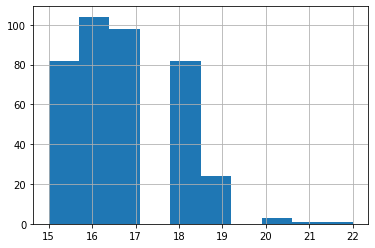

In [18]:
data.age.hist()
data.age.describe()

Пропусков нет. Наш возрастной диапазон 15-22. Давайте посмотрим, имеются ли выбросы.

In [19]:
IQR_age = data.age.quantile(0.75) - data.age.quantile(0.25)
perc25_age = data.age.quantile(0.25)
perc75_age = data.age.quantile(0.75)

print(
    '25-й перцентиль: {},'.format(perc25_age),
    '75-й перцентиль: {},'.format(perc75_age),
    "IQR: {}, ".format(IQR_age),
    "Границы выбросов: [{f}, {l}].".format(f=perc25_age - 1.5*IQR_age, l=perc75_age + 1.5*IQR_age))

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


In [20]:
data.age.value_counts()

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

Мы видим, что одно значения - 22 - выходит за границы и считается выбросом. Однако, я считаю, что разница в 1 год несущественна, и этот возраст можно не считать в качестве выброса, следственно оставить в датасете.

Интересно, что у нас есть определенное кол-во студентов, выходящих за 75-й перцентиль, которые чаще по возрасту относятся к студентам, не к школьникам. Можно предположить, что это ученики, которые позже пошли в школу (19 лет) или находятся еще в школе по причине не лучшей успеваемости (20-22 года). В таком случае, при дальнейшем анализе необходимо будет внимательнее посмотреть на корреляцию между возрастом и  оценкой (score). 

### Дальнейшая последовательность действий:

Дальше давайте рассмотрим еще 11 колонок, у которых есть два варианта ответов (бинарные). Затем рассмотрим колонки, где в качестве значений представлены числа, и в конце проведем первичный анализ данных оставшихся номинативных колонок.

### ['address']

In [21]:
data.address.describe()

count     378
unique      2
top         U
freq      295
Name: address, dtype: object

In [22]:
data.address.value_counts()

U    295
R     83
Name: address, dtype: int64

In [23]:
# посмотрим, сколько пустых значений

data.address.isnull().sum()

17

В колонке адреса у нас есть два уникальных значения (U - urban, R - rural). А также 17 пропущенных значений.

Можно предположить, что место жительства ученика связано со школой. Давайте посмотрим на распределение учеников по графе адреса и по графе школы.

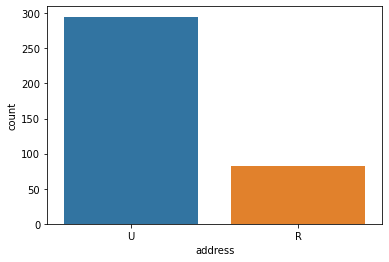

In [24]:
# address

sns.countplot(x='address', data=data)

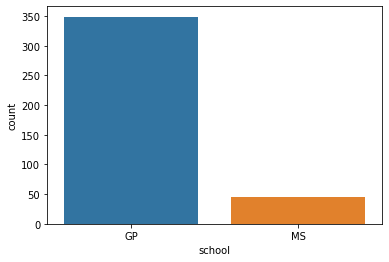

In [25]:
# school

sns.countplot(x='school', data=data)

Несмотря на то, что разница между школами больше, чем между местом проживания, определенная зависимости все-таки прослеживается. В связи с этим, чтобы не избавляться от 17 пустых значений (так как в них далее может быть полезная информация) и не придавать им всем значение наиболее часто встречающегося адреса, предлагаю распределить пустые значения на urban и rural в зависимости от школы, которую посещает ученик. Так мы не особо затронем соотношение.

In [26]:
# присвоим значение U учащимся из школы GP, если значение адреса пропущено.

data.loc[(data['school'] == 'GP') & (data.address.isnull()), 'address'] = 'U'

In [27]:
# присвоим значение R остальным учащимся с пропущенным адресом.

data.loc[(data.address.isnull()), 'address'] = 'R'

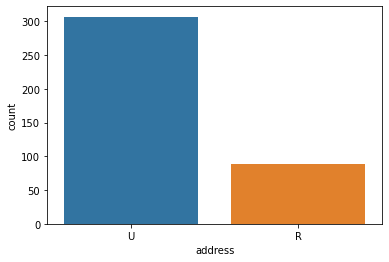

In [28]:
# проверим, что у нас получилось

sns.countplot(x='address', data=data)

In [29]:
data.address.describe()

count     395
unique      2
top         U
freq      307
Name: address, dtype: object

In [30]:
data.address.value_counts()

U    307
R     88
Name: address, dtype: int64

### ['famsize']

In [31]:
data.famsize.describe()

count     368
unique      2
top       GT3
freq      261
Name: famsize, dtype: object

In [32]:
data.famsize.value_counts()

GT3    261
LE3    107
Name: famsize, dtype: int64

In [33]:
data.famsize.isnull().sum()

27

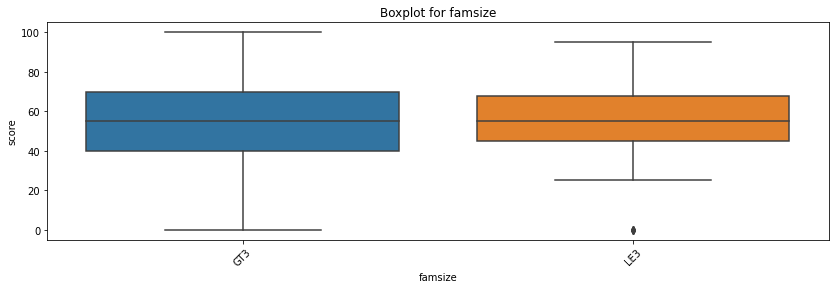

In [34]:
# посмотрим boxplot значений famsize & score

get_boxplot('famsize')

В данной колонке у нас два уникальных значения и 27 пропусков (много).
Однако здесь, в отличие от адреса, нет возможности сопоставить значения размера семьи с какой-либо другой колонкой. Теоретически, возможно, размер семьи мог бы быть связан с достатком семьи, но мы не располагаем данной информацией.

Также выделить только одно значение (на данный момент), к примеру моду, и заменить на моду также не считаю возможным, так как разница между двумя значениями не настолько подавляюще огромна. 

По боксплоту не видно сильной зависимости между оценкой и размером семьи, что не является, конечно, 100% гарантией того, что данный признак не повлияет на модель.

Однако на данном этапе это дает нам возможность оставить значения без изменений и вернуться к колонке для возможного заполнения после формирования модели при необходимости. 

### ['p_status']

In [35]:
data.p_status.describe()

count     350
unique      2
top         T
freq      314
Name: p_status, dtype: object

In [36]:
data.p_status.value_counts()

T    314
A     36
Name: p_status, dtype: int64

In [37]:
data.p_status.isnull().sum()

45

В данной колонке мы имеем два уникальных значения (T - вместе, together и А - раздельно, apart).
У нас 45 пропущенных значений (более 10%), что достаточно много.
Сопоставить значения проживания родителей со значениями другой колонки не представляется возможным. Однако оставлять столько пустых значений тоже не хочется. Давайте повнимательнее посмотрим на данную колонку, отфильтровав по пустым значениями.

In [38]:
data[data.p_status.isnull()]

,school,sex,age,address,famsize,p_status,m_edu,f_edu,m_job,f_job,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,go_out,health,absences,score
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0
11,GP,F,15,U,GT3,NaN,2.0,40.0,services,other,reputation,father,3.0,3.0,0.0,no,yes,no,yes,yes,yes,yes,no,5.0,2.0,2.0,4.0,4.0,60.0
15,GP,F,16,U,GT3,NaN,4.0,4.0,health,other,home,mother,1.0,1.0,0.0,no,yes,no,no,yes,yes,yes,no,4.0,4.0,4.0,2.0,4.0,70.0
25,GP,F,16,U,GT3,NaN,2.0,2.0,services,services,home,mother,1.0,1.0,2.0,no,yes,yes,no,no,yes,yes,no,-1.0,2.0,2.0,5.0,14.0,40.0
28,GP,M,16,U,LE3,NaN,3.0,4.0,services,other,home,mother,1.0,2.0,0.0,yes,NaN,no,yes,yes,yes,yes,no,5.0,3.0,3.0,5.0,4.0,55.0
54,GP,F,15,U,LE3,NaN,3.0,3.0,NaN,other,other,mother,1.0,1.0,NaN,no,no,yes,NaN,yes,yes,yes,NaN,5.0,3.0,4.0,1.0,6.0,65.0
63,GP,F,16,U,GT3,NaN,4.0,3.0,teacher,health,NaN,mother,1.0,3.0,0.0,yes,yes,yes,yes,yes,yes,yes,no,3.0,4.0,4.0,4.0,2.0,45.0
67,GP,F,16,U,GT3,NaN,3.0,NaN,services,other,course,mother,1.0,4.0,0.0,yes,yes,yes,no,yes,yes,yes,NaN,4.0,3.0,3.0,5.0,4.0,30.0
81,GP,M,15,U,GT3,NaN,2.0,3.0,other,other,home,NaN,1.0,3.0,0.0,yes,no,NaN,NaN,no,yes,yes,no,5.0,3.0,2.0,5.0,4.0,55.0


Никакой явной зависимости от других признаков не видно.

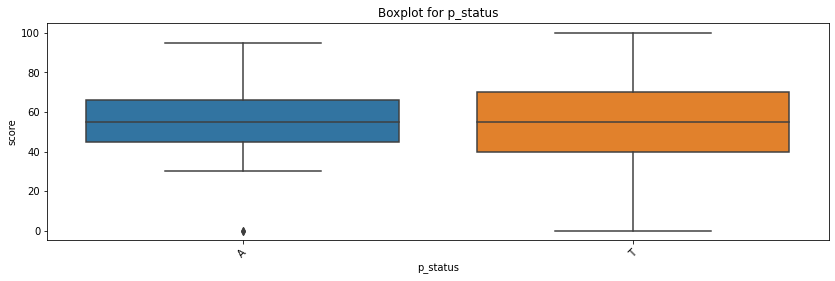

In [39]:
# Построим boxplot

get_boxplot('p_status')

Явной зависимости также не наблюдается.

Однако мы видим, что значение T встречается у 90% данных, что дает нам основания считать данный признак доминирующим. 
Давайте заменим пропущенные значения на самый часто встречающийся признак.

In [40]:
data.p_status = data.p_status.fillna('T')

In [41]:
# проверим, что у нас получилось

data.p_status.describe()

count     395
unique      2
top         T
freq      359
Name: p_status, dtype: object

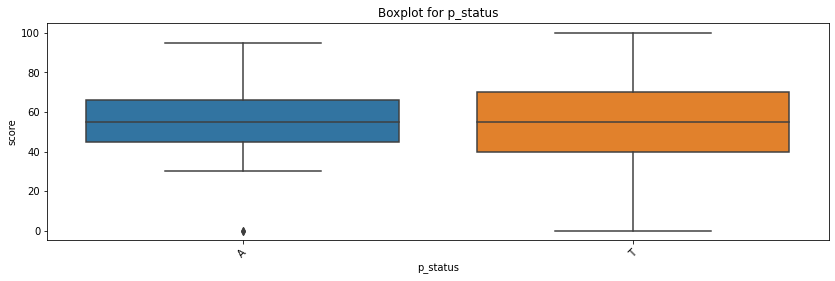

In [42]:
# посмотрим, сильно ли изменилось распределение

get_boxplot('p_status')

При визуальном анализе разница незначительна. Двигаемся дальше по колонкам с бинарными признаками.

### ['schoolsup']

In [43]:
data.schoolsup.describe()

count     386
unique      2
top        no
freq      335
Name: schoolsup, dtype: object

In [44]:
data.schoolsup.value_counts()

no     335
yes     51
Name: schoolsup, dtype: int64

In [45]:
data.schoolsup.isnull().sum()

9

В данной колонке у нас два уникальный значения и 9 пропусков.
Не так много, что дает нам возможность заменить недостающие значения на самые часто встречающиеся, учитывая также тот факт, что наиболее часто встречающееся значение "no" можно отнести к доминирующему, так как оно составляет 87% значений в колонке.

In [46]:
data.schoolsup = data.schoolsup.fillna('no')

In [47]:
# проверим, что у нас получилось

data.schoolsup.describe()

count     395
unique      2
top        no
freq      344
Name: schoolsup, dtype: object

In [48]:
data.schoolsup.value_counts()

no     344
yes     51
Name: schoolsup, dtype: int64

### ['famsup']

In [49]:
data.famsup.describe()

count     356
unique      2
top       yes
freq      219
Name: famsup, dtype: object

In [50]:
data.famsup.value_counts()

yes    219
no     137
Name: famsup, dtype: int64

In [51]:
data.famsup.isnull().sum()

39

В колонке два уникальных значения и 39 пропусков, что достаточно много. Сильного доминирования одного признака над другим (более 85%) не отмечается, в связи с этим давайте построим boxplot.

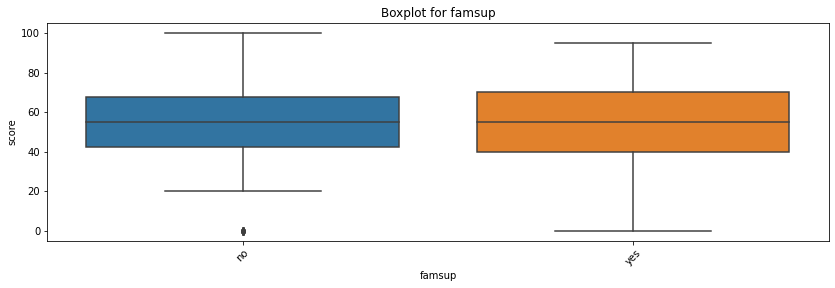

In [52]:
get_boxplot('famsup')

Выделить только одно значение (на данный момент), к примеру моду, и заменить на моду не считаю возможным, так как разница между двумя значениями не настолько подавляюще огромна.

По боксплоту не видно сильной зависимости, что не является, конечно, 100% гарантией того, что данный признак не повлияет на модель.

Однако на данном этапе это дает нам возможность оставить значения без изменений и вернуться к колонке для заполнения после формирования модели при необходимости.

### ['paid']

In [53]:
data.paid.describe()

count     355
unique      2
top        no
freq      200
Name: paid, dtype: object

In [54]:
data.paid.value_counts()

no     200
yes    155
Name: paid, dtype: int64

In [55]:
data.paid.isnull().sum()

40

В колонке представлено два уникальных значений и 40 пропусков (много).
Сильного доминирования одного признака над другим (более 85%) не отмечается, в связи с этим давайте построим boxplot.

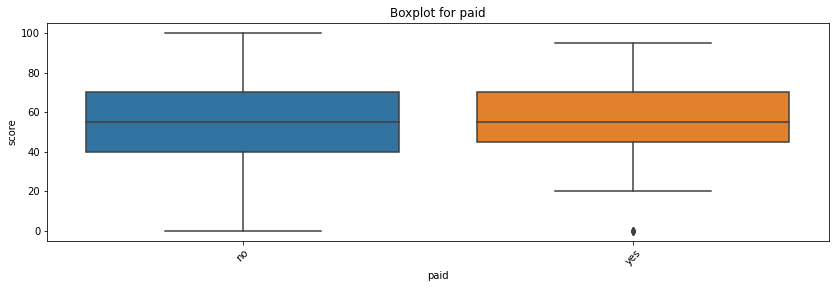

In [56]:
get_boxplot('paid')

Выделить только одно значение (на данный момент), к примеру моду, и заменить на моду не считаю возможным, так как разница между двумя значениями не настолько подавляюще огромна. 

По боксплоту не видно сильной зависимости, что не является, конечно, 100% гарантией того, что данный признак не повлияет на модель. Однако на данном этапе это дает нам возможность оставить значения без изменений и вернуться к колонке для заполнения после формирования модели при необходимости.

### ['activities']

In [57]:
data.activities.describe()

count     381
unique      2
top       yes
freq      195
Name: activities, dtype: object

In [58]:
data.activities.value_counts()

yes    195
no     186
Name: activities, dtype: int64

In [59]:
data.activities.isnull().sum()

14

В колонке представлено два уникальных значений и 14 пропусков. Сильного доминирования одного признака над другим (более 85%) не отмечается. Построим boxplot.

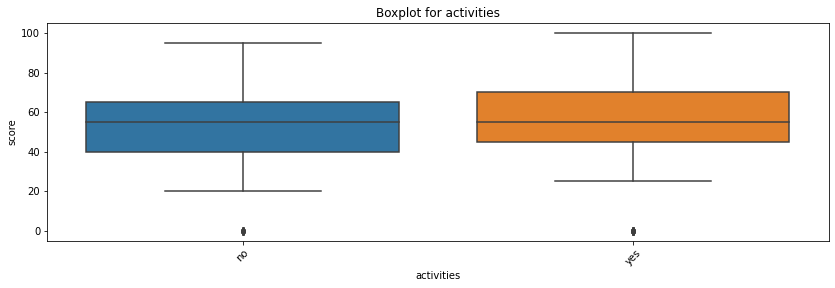

In [60]:
get_boxplot('activities')

Выделить только одно значение (на данный момент), к примеру моду, и заменить на моду не считаю возможным, так как разница между двумя значениями не настолько подавляюще огромна.

По боксплоту не видно сильной зависимости, что не является, конечно, 100% гарантией того, что данный признак не повлияет на модель. Однако на данном этапе это дает нам возможность оставить значения без изменений и вернуться к колонке для заполнения после формирования модели при необходимости.

### ['nursery']

In [61]:
data.nursery.describe()

count     379
unique      2
top       yes
freq      300
Name: nursery, dtype: object

In [62]:
data.nursery.value_counts()

yes    300
no      79
Name: nursery, dtype: int64

In [63]:
data.nursery.isnull().sum()

16

В колонке представлено 2 уникальных значения и 16 пропусков. Сильного доминирования одного признака над другим (более 85%) не отмечается. Построим boxplot.

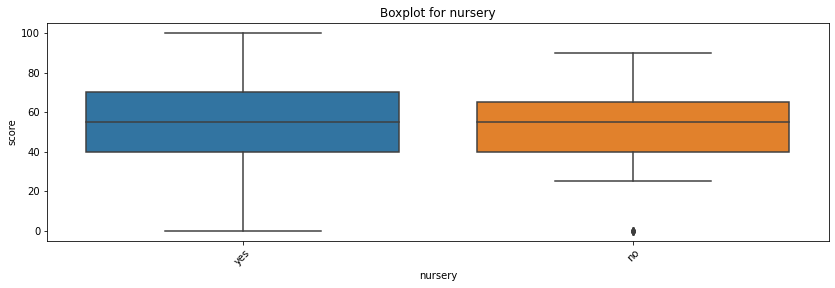

In [64]:
get_boxplot('nursery')

Выделить только одно значение (на данный момент), к примеру моду, и заменить на моду не считаю возможным, так как разница между двумя значениями не настолько подавляюще огромна.

По боксплоту не видно сильной зависимости, что не является, конечно, 100% гарантией того, что данный признак не повлияет на модель. Однако на данном этапе это дает нам возможность оставить значения без изменений и вернуться к колонке для заполнения после формирования модели при необходимости.

### Примечание

Возникла идея выносить незаполненные значения в отдельный признак, к примеру, no_answer. Однако считаю, что подобный вариант будет более актуален для колонок с несколькими значениями (>3), так как бинарные значения предполалагют возможность перевода ответов в численное обозначение (0, 1). 

Суждение может быть ошибочным, но на данном этапе, предлагаю оставить бинарные колонки бинарными, не вводя новые признаки. После построения модели, можно будет вернуться и при необходимости и целесообразности поработать с колонками, в которых мы оставили пропуски, возможно, заполнив их по принципу процентного соотношения.

### ['higher']

In [65]:
data.higher.describe()

count     375
unique      2
top       yes
freq      356
Name: higher, dtype: object

In [66]:
data.higher.value_counts()

yes    356
no      19
Name: higher, dtype: int64

In [67]:
data.higher.isnull().sum()

20

В данной колонке у нас два уникальных значений и 20 пропусков. Одно значение (yes) доминирует на другим. Им заполнено 95% строк. В связи с чем предлагаю заполнить пустые значения данной модой.

In [68]:
data.higher = data.higher.fillna('yes')

In [69]:
# проверяем

data.higher.describe()

count     395
unique      2
top       yes
freq      376
Name: higher, dtype: object

In [70]:
data.higher.value_counts()

yes    376
no      19
Name: higher, dtype: int64

### ['internet']

In [71]:
data.internet.describe()

count     361
unique      2
top       yes
freq      305
Name: internet, dtype: object

In [72]:
data.internet.value_counts()

yes    305
no      56
Name: internet, dtype: int64

In [73]:
data.internet.isnull().sum()

34

В данной колонке у нас два уникальных значений и 34 пропусков. Одно значение (yes) доминирует на другим. Им заполнено 85% строк. В связи с чем предлагаю заполнить пустые значения данной модой.

In [74]:
data.internet = data.internet.fillna('yes')

In [75]:
# проверяем

data.internet.describe()

count     395
unique      2
top       yes
freq      339
Name: internet, dtype: object

In [76]:
data.internet.value_counts()

yes    339
no      56
Name: internet, dtype: int64

### ['romantic']

In [77]:
data.romantic.describe()

count     364
unique      2
top        no
freq      240
Name: romantic, dtype: object

In [78]:
data.romantic.value_counts()

no     240
yes    124
Name: romantic, dtype: int64

In [79]:
data.romantic.isnull().sum()

31

В колонке представлено 2 уникальных значения и 31 пропусков. Сильного доминирования одного признака над другим (более 85%) не отмечается. Построим boxplot.

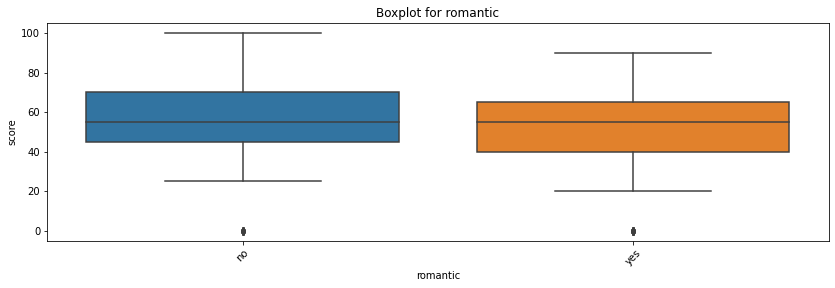

In [80]:
get_boxplot('romantic')

Выделить только одно значение (на данный момент), к примеру моду, и заменить на моду не считаю возможным, так как разница между двумя значениями не настолько подавляюще огромна.

По боксплоту не видно сильной зависимости, что не является, конечно, 100% гарантией того, что данный признак не повлияет на модель. Однако на данном этапе это дает нам возможность оставить значения без изменений и вернуться к колонке для заполнения после формирования модели при необходимости.

### Переходим к первичному анализу колонок с числовыми значениями.

### ['m_edu']

count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: m_edu, dtype: float64

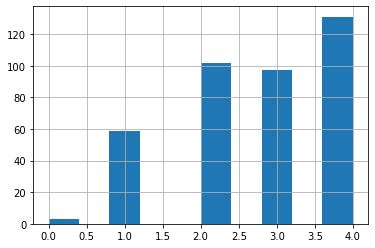

In [81]:
data.m_edu.hist()
data.m_edu.describe()

In [82]:
data.m_edu.value_counts()

4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
Name: m_edu, dtype: int64

In [83]:
data.m_edu.isnull().sum()

3

Мы видим 5 уникальных значений, а также что значения распределяются между 0 и 4, как и указано в описании задачи, следственно выбросов нет. У нас также есть 3 пропущенных значения, что не так много, и при замене на медиану не повлияет на соотношение.
Давайте заменим недостающие значения на медиану.

In [84]:
data.m_edu = data.m_edu.fillna(data.m_edu.median())

count    395.000000
mean       2.751899
std        1.094154
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: m_edu, dtype: float64

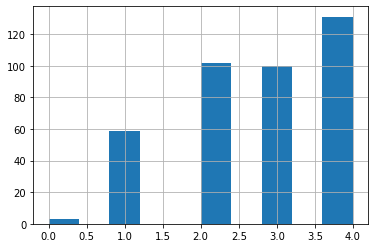

In [85]:
# проверим, что получилось

data.m_edu.hist()
data.m_edu.describe()

Проверим, как изменилось значение среднего после заполнения пустых значений. Разница в среднем значении изменилась на 0.01, что не страшно.

### ['f_edu']

count    371.000000
mean       2.614555
std        2.228732
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: f_edu, dtype: float64

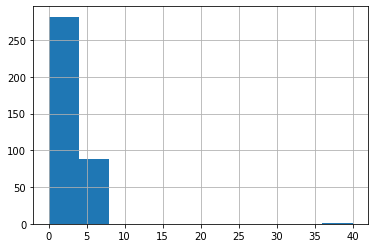

In [86]:
data.f_edu.hist()
data.f_edu.describe()

In [87]:
data.f_edu.value_counts()

2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: f_edu, dtype: int64

Мы видим, что, в основном, значения распределны между 0 и 4. Однако присутствует одно значение 40, которое является выбросом и не входит в наши заданные возможные признаки.

Скорее всего, это ошибка при записи, и предполагалось написание 4, не 40. Поэтому мы не будем избавляться от данного значения, а заменим его на 4.

In [88]:
data.f_edu = data.f_edu.replace(to_replace=40.0, value=4.0)

count    371.000000
mean       2.517520
std        1.088808
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: f_edu, dtype: float64

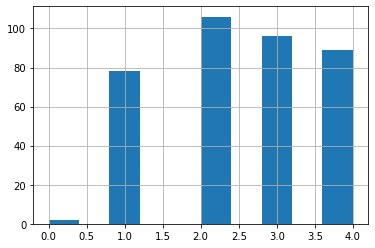

In [89]:
# посмотрим, что получилось

data.f_edu.hist()
data.f_edu.describe()

In [90]:
data.f_edu.value_counts()

2.0    106
3.0     96
4.0     89
1.0     78
0.0      2
Name: f_edu, dtype: int64

In [91]:
data.f_edu.isnull().sum()

24

Так уже лучше. Теперь у нас 5 уникальных значений. Однако есть 24 пропуска, что достаточно много. Давайте посмотрим на гистограмму для образования родителей вместе, может, между образованием мамы и папы есть связь.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1188b22b0>,
      dtype=object)

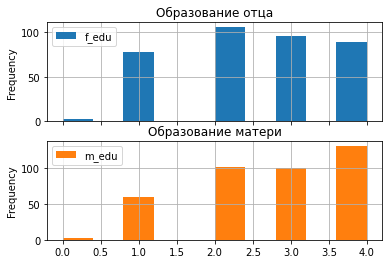

In [92]:
data[['f_edu', 'm_edu']].plot(kind='hist',
                              grid=True,
                              subplots=True,
                              title=['Образование отца', 'Образование матери'])

Посмотрим, есть ли корреляция между этими признаками.

In [93]:
data.f_edu.corr(data['m_edu'])

0.6224241945302584

Между образованием отца и матери есть корреляция. В связи с этим предлагаю заполнить пустые значения в образовании отца на основании образования матери. 

In [94]:
data.loc[(data['m_edu'] == 4.0) & (data.f_edu.isnull()), 'f_edu'] = 4.0
data.loc[(data['m_edu'] == 3.0) & (data.f_edu.isnull()), 'f_edu'] = 3.0
data.loc[(data['m_edu'] == 2.0) & (data.f_edu.isnull()), 'f_edu'] = 2.0
data.loc[(data['m_edu'] == 1.0) & (data.f_edu.isnull()), 'f_edu'] = 1.0

count    395.000000
mean       2.546835
std        1.092061
min        0.000000
25%        2.000000
50%        3.000000
75%        3.500000
max        4.000000
Name: f_edu, dtype: float64

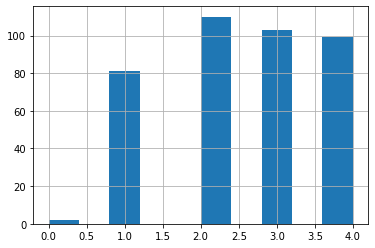

In [95]:
# проверим, что у нас получилось

data.f_edu.hist()
data.f_edu.describe()

### ['traveltime']

count    367.000000
mean       1.438692
std        0.694181
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

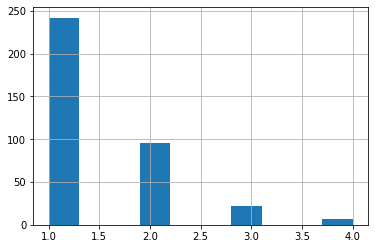

In [96]:
data.traveltime.hist()
data.traveltime.describe()

In [97]:
data.traveltime.value_counts()

1.0    242
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64

In [98]:
data.traveltime.isnull().sum()

28

В колонке представлено 4 уникальных значения, выбросов нет. Пустых значений - 28. Одно значение (1.0) доминирует над другими. Есть возможность заменить пропуски на доминирующее значение. Давайте так и сделаем.

In [99]:
data.traveltime = data.traveltime.fillna(data.traveltime.median())

count    395.000000
mean       1.407595
std        0.678490
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

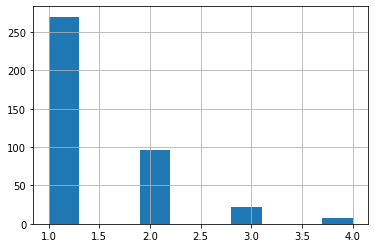

In [100]:
# посмотрим, что получилось

data.traveltime.hist()
data.traveltime.describe()

In [101]:
data.traveltime.value_counts()

1.0    270
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64

Проверим, как изменилось значение среднего после заполнения пустых значений. Разница в среднем значении изменилась на 0.03, что не страшно.

### ['studytime']

count    388.000000
mean       2.038660
std        0.842078
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

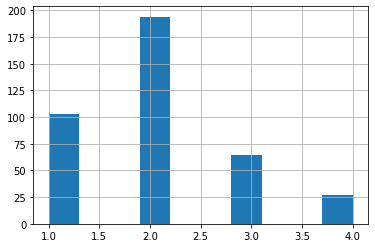

In [102]:
data.studytime.hist()
data.studytime.describe()

In [103]:
data.studytime.value_counts()

2.0    194
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64

In [104]:
data.studytime.isnull().sum()

7

В колонке представлено 4 уникальных значения, выбросов нет. Пустых значений - 7. Одно значение (2.0) доминирует над другими. Есть возможность заменить пропуски на доминирующее значение. Давайте так и сделаем.

In [105]:
data.studytime = data.studytime.fillna(data.studytime.median())

count    395.000000
mean       2.037975
std        0.834580
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

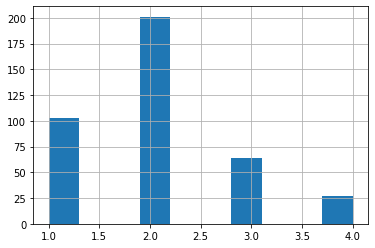

In [106]:
# посмотрим, что получилось

data.studytime.hist()
data.studytime.describe()

In [107]:
data.studytime.value_counts()

2.0    201
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64

Проверим, как изменилось значение среднего после заполнения пустых значений. Разница в среднем значении изменилась на 0.001, что не страшно.

### ['failures']

count    373.000000
mean       0.337802
std        0.743135
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

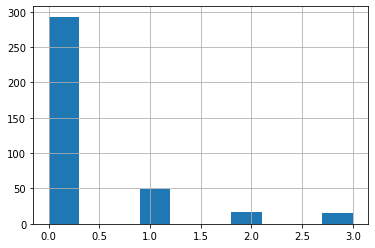

In [108]:
data.failures.hist()
data.failures.describe()

In [109]:
data.failures.value_counts()

0.0    293
1.0     49
2.0     16
3.0     15
Name: failures, dtype: int64

In [110]:
data.failures.isnull().sum()

22

В колонке представлено 4 уникальных значения, выбросов нет. Пустых значений - 22. Одно значение (0) доминирует над другими. Есть возможность заменить пропуски на доминирующее значение. Давайте так и сделаем.

In [111]:
data.failures = data.failures.fillna(data.failures.median())

count    395.000000
mean       0.318987
std        0.726244
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

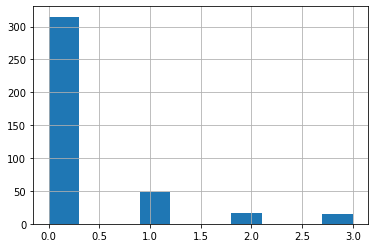

In [112]:
# проверим, что получилось

data.failures.hist()
data.failures.describe()

Проверим, как изменилось значение среднего после заполнения пустых значений. Разница в среднем значении изменилась на 0.02, что не страшно. 

### ['famrel']

count    368.000000
mean       3.937500
std        0.927277
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

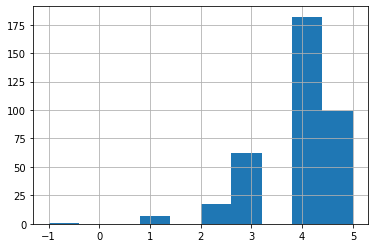

In [113]:
data.famrel.hist()
data.famrel.describe()

In [114]:
data.famrel.value_counts()

 4.0    182
 5.0     99
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

Итак, мы видим, что в основном значения распределены между 1 и 5, что соответствует условиям задачи. Однако есть одно значение -1, которое выбивается из условий.

Вероятно, допущена ошибка при записи. Предполагалось 1, а не -1. Заменим неверное значение.

In [115]:
data.famrel = data.famrel.replace(to_replace=-1.0, value=1.0)

count    368.000000
mean       3.942935
std        0.903824
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

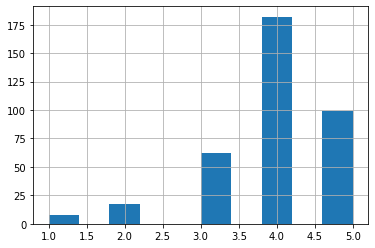

In [116]:
# проверим, что получилось

data.famrel.hist()
data.famrel.describe()

In [117]:
data.famrel.value_counts()

4.0    182
5.0     99
3.0     62
2.0     17
1.0      8
Name: famrel, dtype: int64

In [118]:
data.famrel.isnull().sum()

27

Уже лучше, выбросов нет. Однако у нас 27 пустых значений. Это достаточно много, но признак 4.0 с натяжкой можно назвать сильно доминирующим, а значений для замены достаточно много.

Поэтому на данном этапе считаю целесообразным оставить пустые значения без изменения и вернуться к колонке после построения модели, если это будет необходимо.

### ['freetime']

count    384.000000
mean       3.231771
std        0.993940
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

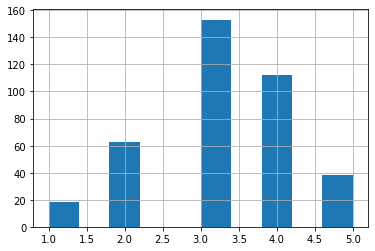

In [119]:
data.freetime.hist()
data.freetime.describe()

In [120]:
data.freetime.value_counts()

3.0    153
4.0    112
2.0     63
5.0     38
1.0     18
Name: freetime, dtype: int64

In [121]:
data.freetime.isnull().sum()

11

У нас представлено 5 уникальных значений, без выбросов. И 11 пустых значений. Явного доминирующего признака не наблюдается, вариантов для замены достаточно много.

Поэтому на данном этапе считаю целесообразным оставить пустые значения без изменения и вернуться к колонке после построения модели, если это будет необходимо.

### ['go_out']

count    387.000000
mean       3.105943
std        1.115896
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: go_out, dtype: float64

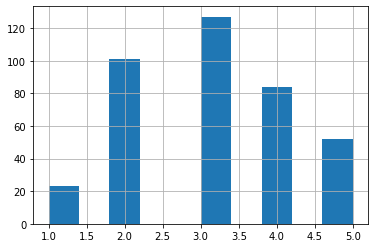

In [122]:
data.go_out.hist()
data.go_out.describe()

In [123]:
data.go_out.value_counts()

3.0    127
2.0    101
4.0     84
5.0     52
1.0     23
Name: go_out, dtype: int64

In [124]:
data.go_out.isnull().sum()

8

У нас представлено 5 уникальных значений, без выбросов. И 8 пустых значений. Явного доминирующего признака не наблюдается, вариантов для замены достаточно много.

Поэтому на данном этапе считаю целесообразным оставить пустые значения без изменения и вернуться к колонке после построения модели, если это будет необходимо.

### ['health']

count    380.000000
mean       3.531579
std        1.396019
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

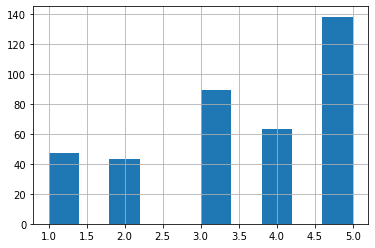

In [125]:
data.health.hist()
data.health.describe()

In [126]:
data.health.value_counts()

5.0    138
3.0     89
4.0     63
1.0     47
2.0     43
Name: health, dtype: int64

In [127]:
data.health.isnull().sum()

15

У нас представлено 5 уникальных значений, без выбросов. И 15 пустых значений. Явного доминирующего признака не наблюдается, вариантов для замены достаточно много.

Поэтому на данном этапе считаю целесообразным оставить пустые значения без изменения и вернуться к колонке после построения модели, если это будет необходимо.

### ['absences']

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

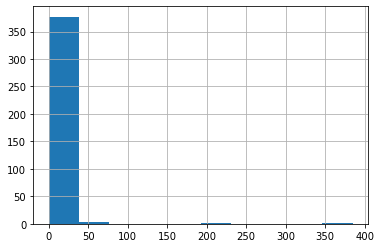

In [128]:
data.absences.hist()
data.absences.describe()

In [129]:
data.absences.isnull().sum()

12

Мы видим, что наши значения распределены в диапазоне от 0 до 385. Также 12 значений у нас пропущено.

На гистограмме видны выбросы. Перепроверим себя на boxplot.

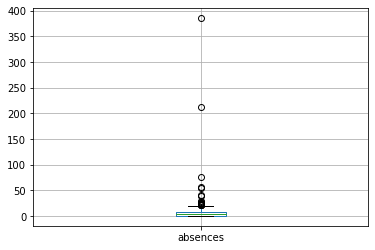

In [130]:
data.boxplot(column='absences')

12 пустых значений заменим на медианное значение.

In [131]:
data.absences = data.absences.fillna(data.absences.median())

Рассчитаем точные значения выбросов и составим гистограмму.

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


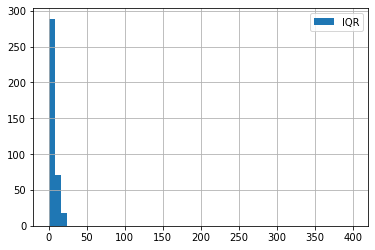

In [132]:
IQR_abs = data.absences.quantile(0.75) - data.absences.quantile(0.25)
perc25_abs = data.absences.quantile(0.25)
perc75_abs = data.absences.quantile(0.75)

print(
    '25-й перцентиль: {},'.format(perc25_abs),
    '75-й перцентиль: {},'.format(perc75_abs),
    "IQR: {}, ".format(IQR_abs),
    "Границы выбросов: [{f}, {l}].".format(f=perc25_abs - 1.5*IQR_abs, l=perc75_abs + 1.5*IQR_abs))

data.absences.loc[data.absences.between(
    perc25_abs - 1.5*IQR_abs,
    perc75_abs + 1.5*IQR_abs)].hist(bins=50, range=(-0.5, 400), label='IQR')

plt.legend()

Как мы видим, границы выбросов у нас от -12 до 20. Сам график выглядит как смещенный вправо, возможно, с длинным (очень размазанным) хвостом. Но теоретически предположить, что ученик мог пропустить 385 занятий, возможно.

Однако давайте посмотрим, сколько у нас учеников, которые выходят за рамки границ выбросов.

In [133]:
data[data.absences > 20].absences.count()

17

Это доволно много значений. Удалять все 17 не хочется. Давайте еще раз построим гистограмму, но ограничим ее не 400, а 40. Так как хвост непрерывно тянется примерно до этого значения.

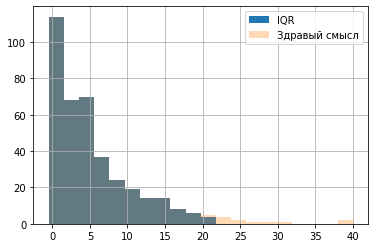

In [134]:
data.absences.loc[data.absences.between(
    perc25_abs - 1.5*IQR_abs,
    perc75_abs + 1.5*IQR_abs)].hist(bins=20, range=(-0.5, 40), label='IQR')

data.absences.loc[data.absences <= 40].hist(
    alpha=0.3, bins=20, range=(-0.5, 40), label='Здравый смысл')

plt.legend()

Итак, мы видим, что после значения границы выброса хвост еще немного тянется до значения 32-33. Далее уже встречаются только всплески в нескольких значениях.

Сколько у нас значений больше 35?

In [135]:
data[data.absences > 35].absences.count()

7

Уже лучше. По "здравому смыслу" тогда у нас получается 7 значений - выбросов. Давайте их удалим в надежде, что это не сильно повлияет.

In [136]:
data = data.loc[data.absences < 35]

count    388.000000
mean       5.092784
std        5.766485
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       30.000000
Name: absences, dtype: float64

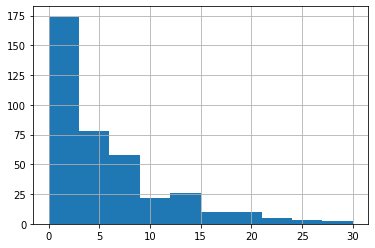

In [137]:
# посмотрим, что у нас получилось

data.absences.hist()
data.absences.describe()

In [138]:
data.loc[:, ['absences']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  388 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


### ['score']

count    382.000000
mean      52.264398
std       23.043739
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

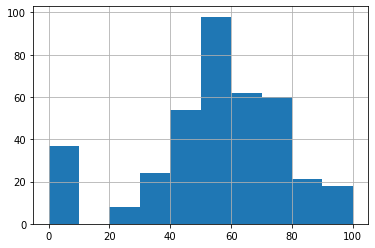

In [139]:
data.score.hist()
data.score.describe()

Итак, мы видим что значения лежат в пределах от 0 до 100. Предполагаем, что оценка производится по 100-балльной шкале.

Однако у нас присутствуют значения 0. С чем может быть связано подобная оценка? Возможно, ученик в принципе не присутствовал на экзамене. 

По графику мы видим, что большинство оценок начинаются со значение 20. Давайте посмотрим, сколько у нас учеников, которые имеют оценку от 0 до 20.

In [140]:
data[data.score < 20].score.count()

37

Таких достаточно много. Посмотрим выбросы.

In [141]:
IQR_score = data.score.quantile(0.75) - data.score.quantile(0.25)
perc25_score = data.score.quantile(0.25)
perc75_score = data.score.quantile(0.75)

print(
    '25-й перцентиль: {},'.format(perc25_score),
    '75-й перцентиль: {},'.format(perc75_score),
    "IQR: {}, ".format(IQR_score))

print("Границы выбросов: [{f}, {l}].".format(
    f=perc25_score - 1.5*IQR_score, l=perc75_score + 1.5*IQR_score))

25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0, 
Границы выбросов: [-5.0, 115.0].


In [142]:
data.score.isnull().sum()

6

Итак, по формуле у нас нет выбросов. Однако значение 0 все-таки оставлять не хочется. Так как теряется целевое назначение строки. 

У нас присутсвует 6 пустых значений. Пустые значения давайте удалим, их немного.

In [143]:
data = data.loc[data.score.isna() == False]

Интересно посмотреть, связано ли нулевое значение оценки и рейтинг здоровья. Если предположить, что ученик не присутствовал на экзамене, так как относится к часто болеющим. Посмотрим boxplot.

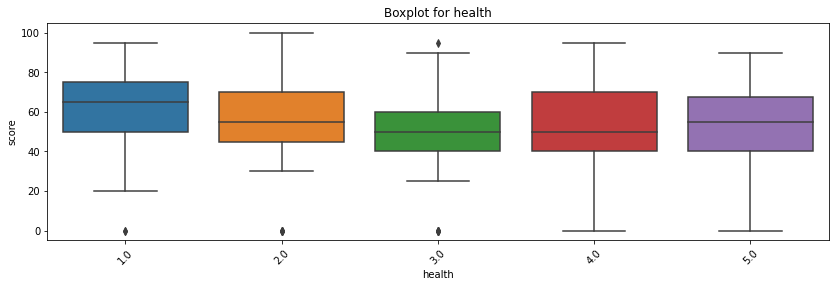

In [144]:
get_boxplot('health')

Плотность распределения отличается, однако нулевые значения встречаются у всех категорий здоровья. Так что однозначные выводы сделать сложно.

Вернемся к нулевым значениям. 

Давайте преположим, что часть учеников получила 0 баллов за экзамен по причине отсутствия или ученик был удален с экзамена. Ни одна из этих причин не может рассматриваться, как закономерность. И так как нам неизвестны причины нулевого значения, лучше их удалить.

In [145]:
data = data.drop(data[data.score == 0].index)

count    345.000000
mean      57.869565
std       16.211639
min       20.000000
25%       50.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

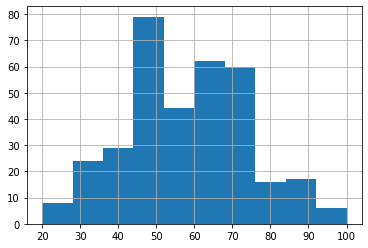

In [146]:
data.score.hist()
data.score.describe()

Для первичного анализа у нас осталось 4 столбца.

### ['m_job']

count       328
unique        5
top       other
freq        111
Name: m_job, dtype: object

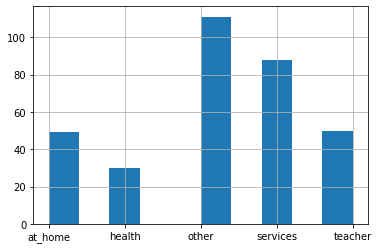

In [147]:
data.m_job.hist()
data.m_job.describe()

In [148]:
data.m_job.value_counts()

other       111
services     88
teacher      50
at_home      49
health       30
Name: m_job, dtype: int64

In [149]:
data.m_job.isnull().sum()

17

В колонке представлено 5 уникальных значений. При этом присутствует 17 пустых значений. Явного доминирующего признака не наблюдается, вариантов для замены достаточно много.

Поэтому на данном этапе считаю целесообразным оставить пустые значения без изменения и вернуться к колонке после построения модели, если это будет необходимо.

### ['f_job']

count       313
unique        5
top       other
freq        174
Name: f_job, dtype: object

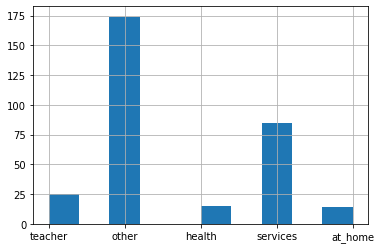

In [150]:
data.f_job.hist()
data.f_job.describe()

In [151]:
data.f_job.value_counts()

other       174
services     85
teacher      25
health       15
at_home      14
Name: f_job, dtype: int64

In [152]:
data.f_job.isnull().sum()

32

В колонке представлено 5 уникальных значений. При этом присутствует 32 пустых значений. Явного доминирующего признака не наблюдается, вариантов для замены достаточно много.

Поэтому на данном этапе считаю целесообразным оставить пустые значения без изменения и вернуться к колонке после построения модели, если это будет необходимо.

### ['reason']

count        330
unique         4
top       course
freq         118
Name: reason, dtype: object

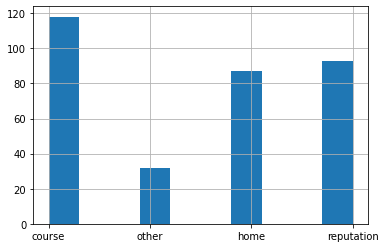

In [153]:
data.reason.hist()
data.reason.describe()

In [154]:
data.reason.value_counts()

course        118
reputation     93
home           87
other          32
Name: reason, dtype: int64

In [155]:
data.reason.isnull().sum()

15

В колонке представлено 4 уникальных значений. При этом присутствует 15 пустых значений. Явного доминирующего признака не наблюдается, вариантов для замены достаточно много.

Поэтому на данном этапе считаю целесообразным оставить пустые значения без изменения и вернуться к колонке после построения модели, если это будет необходимо.

### ['guardian']

count        317
unique         3
top       mother
freq         221
Name: guardian, dtype: object

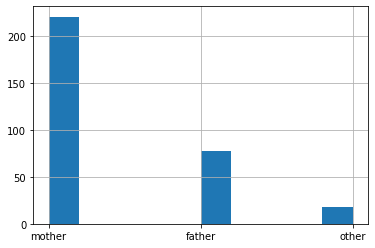

In [156]:
data.guardian.hist()
data.guardian.describe()

In [157]:
data.guardian.value_counts()

mother    221
father     78
other      18
Name: guardian, dtype: int64

In [158]:
data.guardian.isnull().sum()

28

В колонке 3 уникальных значения и 28 пустых значений. Построим boxplot.

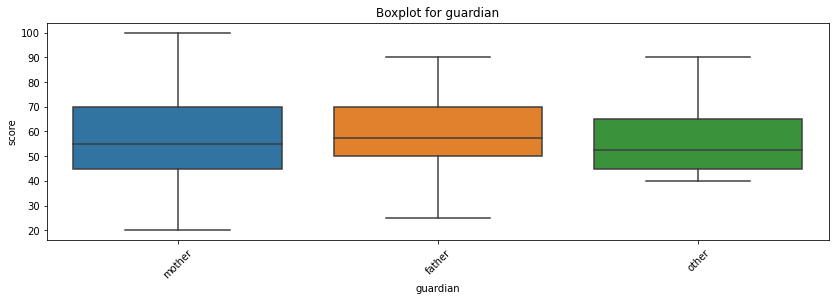

In [159]:
get_boxplot('guardian')

Небольшое изменение в плотности распределения есть, но оно не дает нам оснований на данном этапе на заполнение пропусков. Велика вероятность смещения соотношения.

Пока оставим пропуски, как есть. И вернемся, при необходимости, после построения модели.

## Резюме

Проанализировов все колонки, можем их распределить на три типа для дальнейшего корреляционного анализа.

1. Числовые (3 столбца): age, absences, score
2. Категориальные - бинарные (13 столбцов): school, sex, address, famsize, p_status, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic
3. Категориальные - оценочные (13 столбцов): m_edu, f_edu, m_job, f_job, reason, guardian, traveltime, studytime, failures, famrel, freetime, go_out, health

# Корреляционный анализ

## Начнем с числовых столбцов.
Воспользуемся функцией pairplot из модуля seaborn.

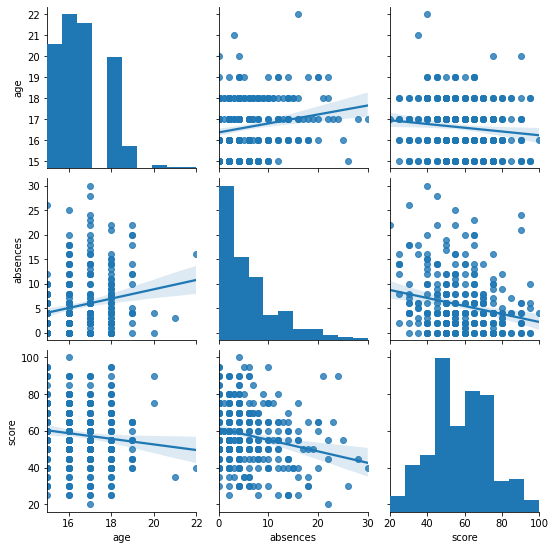

In [160]:
sns.pairplot(data[['age', 'absences', 'score']], kind='reg')

Используем для наглядности матрицу корреляций.

In [161]:
data[['age', 'absences', 'score']].corr()

,age,absences,score
age,1.000000,0.201941,-0.116871
absences,0.201941,1.000000,-0.225521
score,-0.116871,-0.225521,1.000000


Оба этих признака считаю нужным оставить, так как между ними присутствует корреляция. 

Отмечу, что между возрастом и оценкой присутствует обратная корреляция, что может означать, что чем выше возраст, тем ниже оценка. 
И между пропусками и оценкой присутствует обратная корреляция, что может означать, что чем больше ученик пропускал занятий, тем ниже его балл. Плюс прямая корреляция между пропусками и возрастом, то есть чем взрослее ученик, тем больше он пропускает занятия.

## Анализ номинативных столбцов

Для этого построим boxplot для всех оставшихся столбцов (кроме возраста, оценки пропусков).

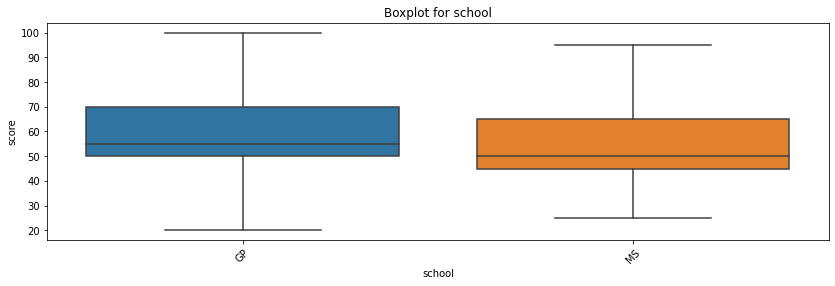

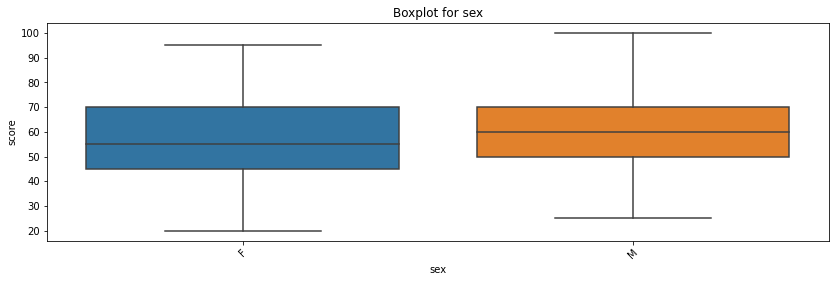

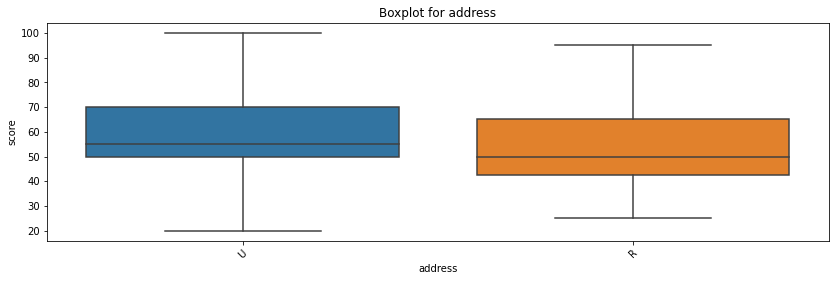

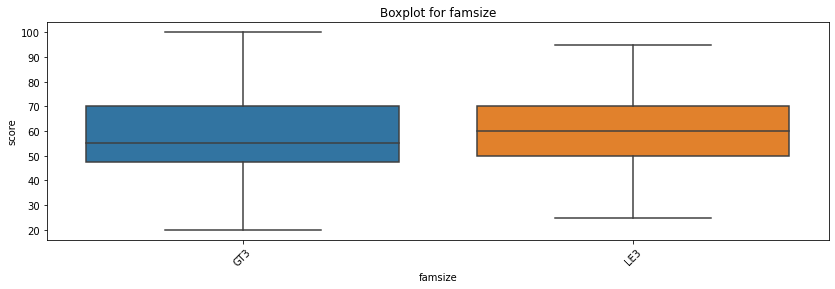

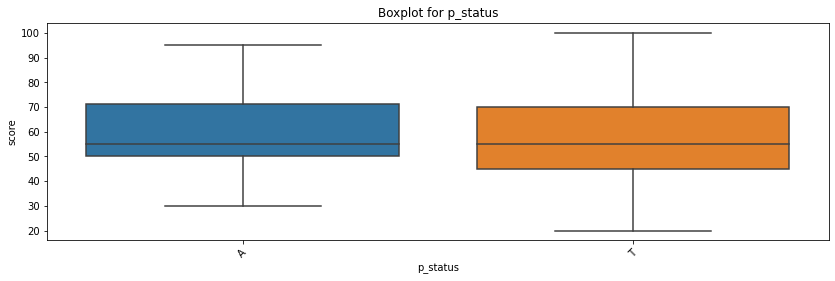

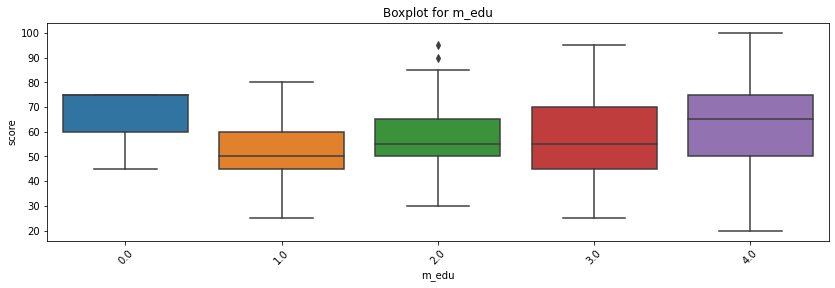

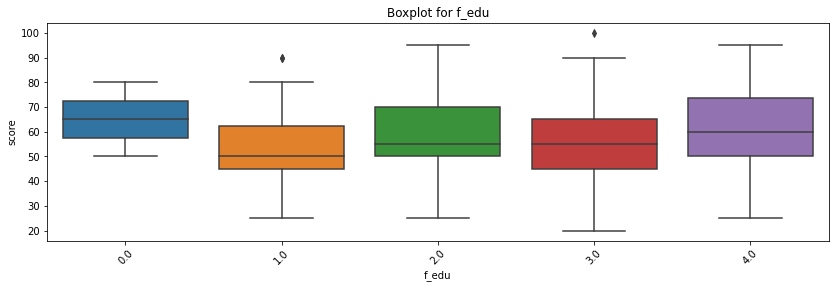

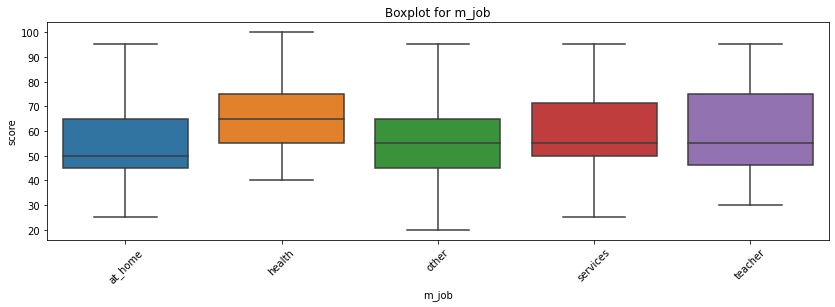

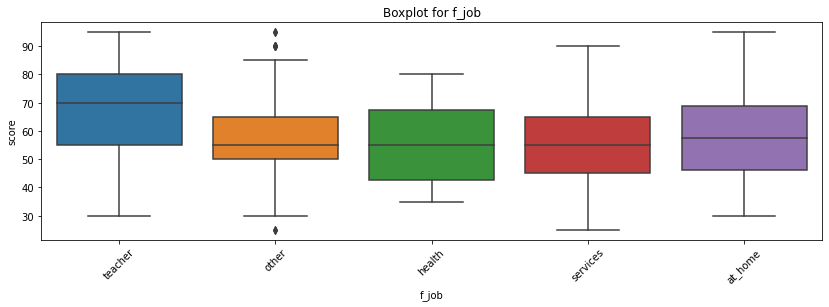

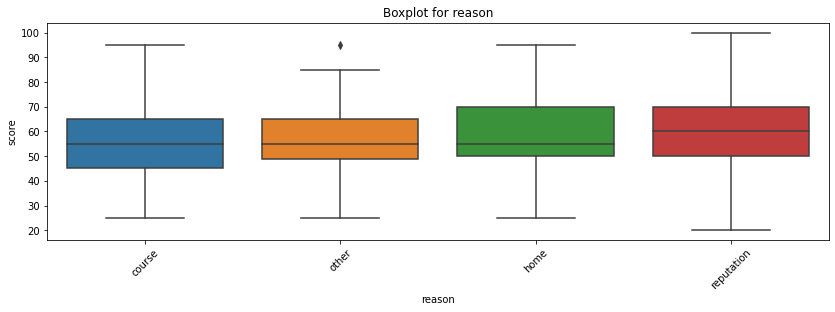

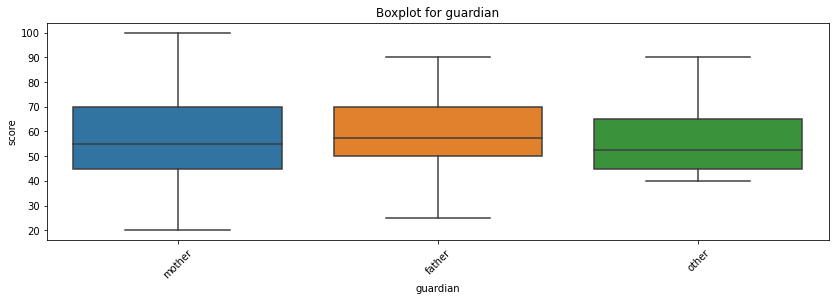

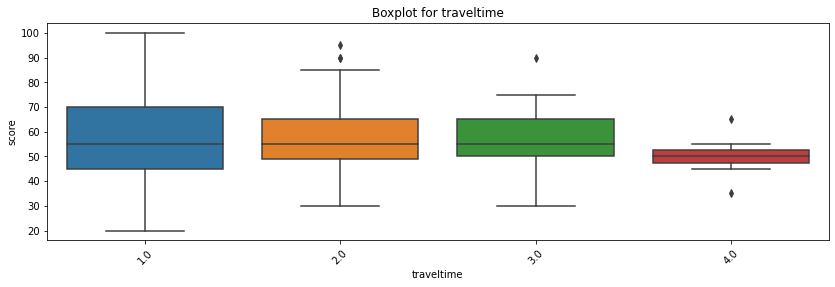

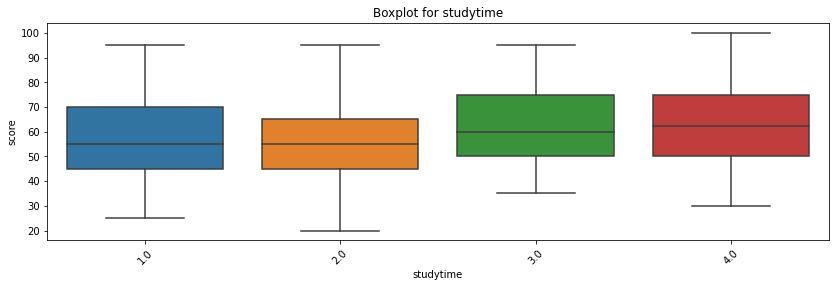

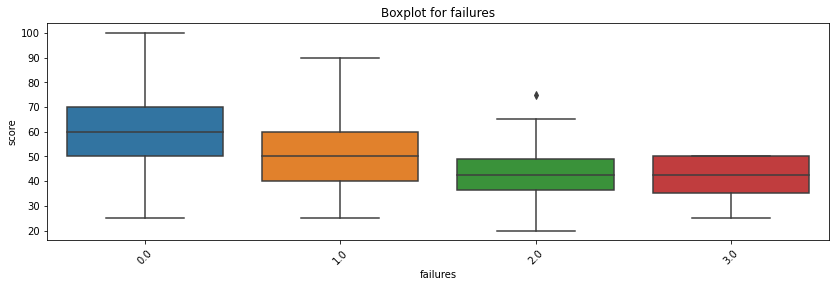

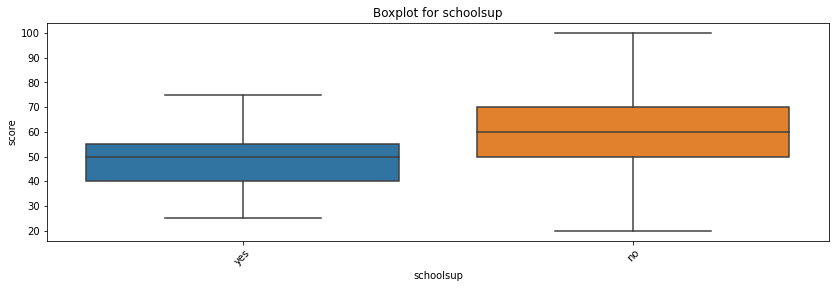

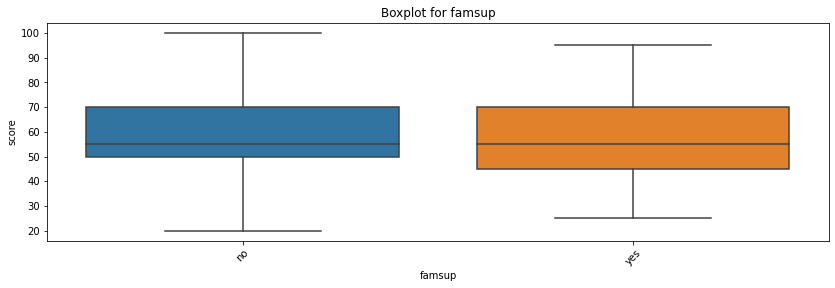

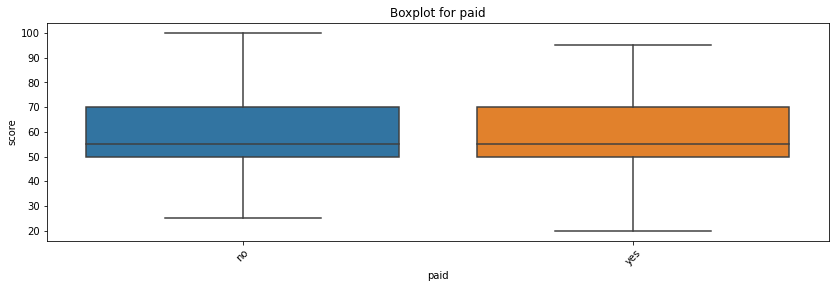

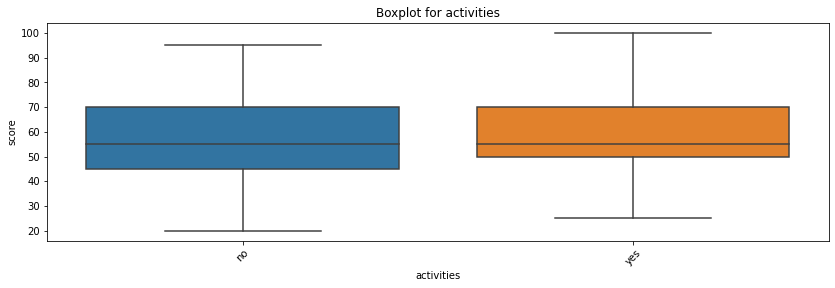

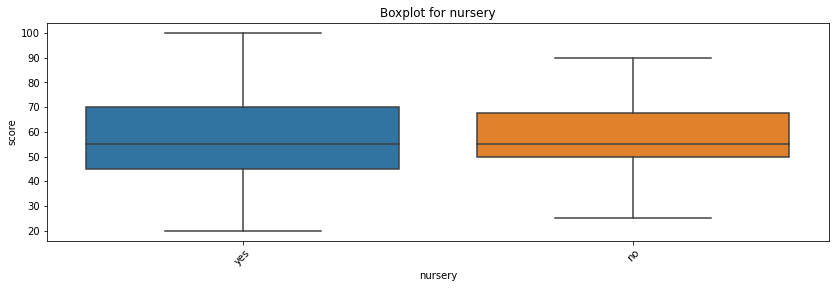

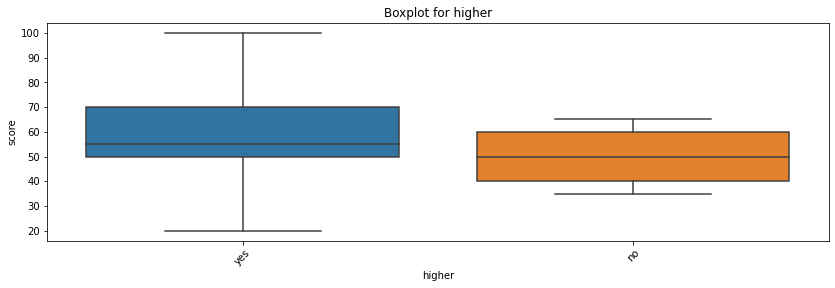

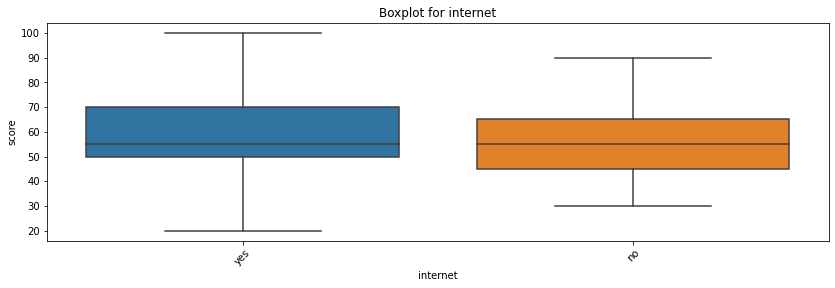

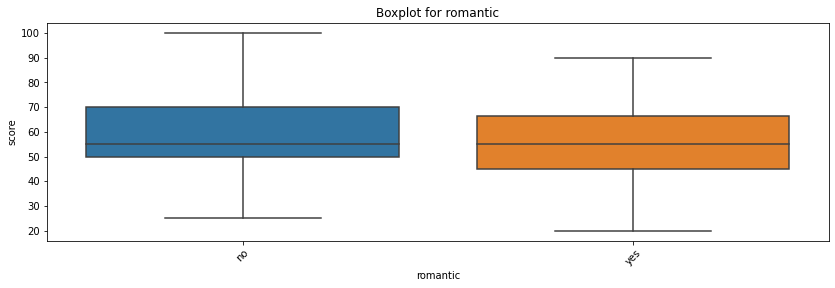

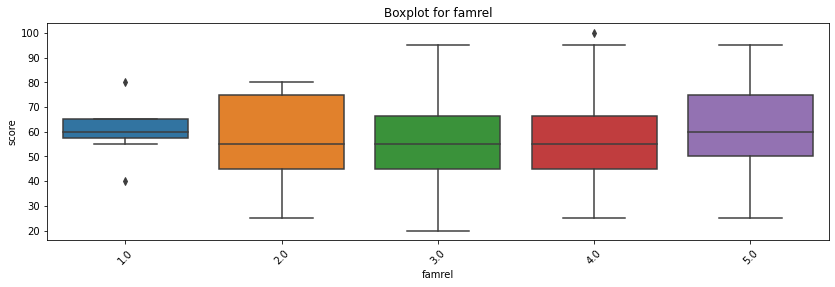

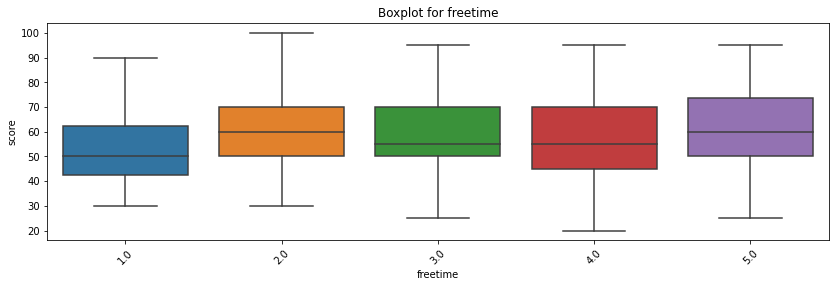

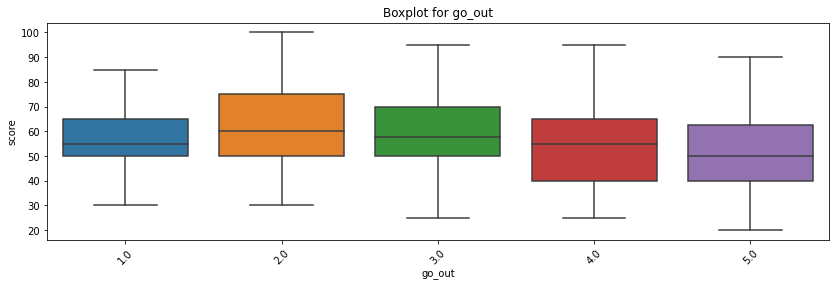

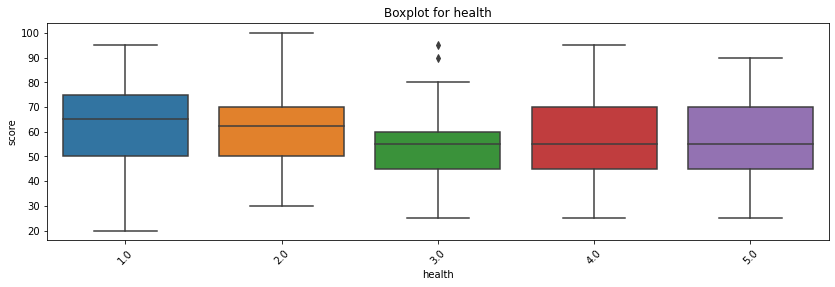

In [162]:
for col in ['school',
            'sex',
            'address',
            'famsize',
            'p_status',
            'm_edu',
            'f_edu',
            'm_job',
            'f_job',
            'reason',
            'guardian',
            'traveltime',
            'studytime',
            'failures',
            'schoolsup',
            'famsup',
            'paid',
            'activities',
            'nursery',
            'higher',
            'internet',
            'romantic',
            'famrel',
            'freetime',
            'go_out',
            'health']:
    get_boxplot(col)

Плотность распределения визуально различается для следующих параметров:
- sex
- address
- m_edu
- f_edu
- m_job
- f_job
- studytime
- failures
- schoolsup
- freetime
- go_out

In [163]:
# проведем тест Стьюдента и проверим нулевую гипотезу о том,
# что распределение оценок по различным параметрам неразлечимы.

for col in ['school',
            'sex',
            'address',
            'famsize',
            'p_status',
            'm_edu',
            'f_edu',
            'm_job',
            'f_job',
            'reason',
            'guardian',
            'traveltime',
            'studytime',
            'failures',
            'schoolsup',
            'famsup',
            'paid',
            'activities',
            'nursery',
            'higher',
            'internet',
            'romantic',
            'famrel',
            'freetime',
            'go_out',
            'health']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки m_edu
Найдены статистически значимые различия для колонки f_edu
Найдены статистически значимые различия для колонки m_job
Найдены статистически значимые различия для колонки studytime
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки schoolsup
Найдены статистически значимые различия для колонки go_out


Итак, как мы видим, статистически значимые различия имеют 9 параметров: sex, address, m_edu, f_edu, m_job, studytime, failures, schoolsup, go_out.

В общей сложности, включая корреляционный анализ числовых столбцов, у нас 11 важных переменных, которые, возможно, оказывают влияние на оценку: age, absences, sex, address, m_edu, f_edu, m_job, studytime, failures, schoolsup, go_out.

Оставим эти переменные в датасете для построения модели, также включая целевую переменную score, без которой невозможно обучение модели.

In [164]:
data_for_model = data.loc[:, ['age', 'absences', 'sex', 'address',
                              'm_edu', 'f_edu', 'm_job', 'studytime',
                              'failures', 'schoolsup', 'go_out', 'score']]
data_for_model.head(10)

,age,absences,sex,address,m_edu,f_edu,m_job,studytime,failures,schoolsup,go_out,score
0,18,6.0,F,U,4.0,4.0,at_home,2.0,0.0,yes,4.0,30.0
1,17,4.0,F,U,1.0,1.0,at_home,2.0,0.0,no,3.0,30.0
2,15,10.0,F,U,1.0,1.0,at_home,2.0,3.0,yes,2.0,50.0
3,15,2.0,F,U,4.0,2.0,health,3.0,0.0,no,2.0,75.0
4,16,4.0,F,U,3.0,3.0,other,2.0,0.0,no,2.0,50.0
5,16,10.0,M,U,4.0,3.0,services,2.0,0.0,no,2.0,75.0
6,16,0.0,M,U,2.0,2.0,other,2.0,0.0,no,4.0,55.0
7,17,6.0,F,U,4.0,4.0,other,2.0,0.0,yes,4.0,30.0
8,15,0.0,M,U,3.0,2.0,services,2.0,0.0,no,2.0,95.0
9,15,0.0,M,U,3.0,4.0,other,2.0,0.0,no,1.0,75.0


# Выводы

В результате EDA для анализа влияния параметров ученика на оценку на экзамене по математике были получены следующие выводы:
1. В данных было немало пропусков. Только в 3 параметрах не было пропусков, в других колонках процент пропусков мог превышать значение 10%.
2. Переменная "studytime, granular" был удален, так как являлся копией столбца "studytime", умноженного на -3.
2. Выбросов было обнаружено немного, или эти выбросы можно было таковыми не считать (ошибка при написании или возможное адекватное значение). 
3. Переменная score содержала много нулевых значений, что может означать, что ученик не явился на экзамен или был дисквалифирован по неизвестным причинам. Так как это частные случаи и точная причина нам неизвестна, нулевые значения были удалены.
4. Между возрастом и оценкой присутствует обратная корреляция, что может означать, что чем выше возраст, тем ниже оценка. 
5. Между пропусками занятий и оценкой присутствует обратная корреляция, что может означать, что чем больше ученик пропускал занятий, тем ниже его балл.
6. Существует также прямая корреляция между возрастом ученика и количеством пропуска занятий. Это показывает, что чем старше ученик, тем больше занятий он пропускает, что в свою очередь также влияет на итоговую оценку.
7. Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это age, absences, sex, address, m_edu, f_edu, m_job, studytime, failures, schoolsup, go_out.